 ### Build the feature vector


# The Decision Tree on the Churn Dataset in Spark

In [1]:
from pyspark.sql import DataFrameReader
from pyspark.sql import SparkSession
from pyspark.ml.feature import IndexToString, StringIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from Notebooks.helpers.helper_functions import translate_to_file_string
#from Notebooks.helpers.helper_functions import delete_space
#Own imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Select the Data file 

In [2]:
inputFile = translate_to_file_string("data/data_test.csv")

## Create the Spark Session 

In [3]:
#create a SparkSession
spark = (SparkSession
       .builder
       .appName("ChurnDecisionTree")
       .getOrCreate())
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile) 
       
#Change Column Names
def delete_space(df):
    names = df.schema.names
    for name in names:
        newName = name.replace(" ","")
        df = df.withColumnRenamed(name, newName)
    return df

## Data Preparation
### Delete Space in DF Column Names


In [9]:

df = delete_space(df)
df.printSchema()
#df.show()
#HTML(df.toPandas().to_html())

root
 |-- CustomerID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)



,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95


### Indexing Method of Pandas (Without Normalizing)

In [4]:
#Create Pandas DataFrame
df_pandas = df.toPandas()
df_pandas_cat = df.toPandas()
#Pandas Indexing Method
pandasCol = list(df_pandas)
for col in pandasCol:
    if df_pandas[col].dtypes=='object':
        #Categorize
        df_pandas_cat[col]= pd.Categorical(pd.factorize(df_pandas_cat[col])[0])
        #ToInteger
        df_pandas[col]= pd.factorize(df_pandas[col])[0]


#Show Data + Schema of the Data

#HTML(df_pandas.head(5).to_html())
#df_pandas.info()
#df_pandas_new.cat()

### Transform labels into index (Pyspark)

In [7]:
IDIndexer = StringIndexer().setInputCol("CustomerID").setOutputCol("CustomerID_Int").fit(df)
genderIndexer = StringIndexer().setInputCol("Gender").setOutputCol("GenderID_Int").fit(df)
seniorIndexer = StringIndexer().setInputCol("SeniorCitizen").setOutputCol("Senior_Int").fit(df)
partnerIndexer = StringIndexer().setInputCol("Partner").setOutputCol("Partner_Int").fit(df)
DependentsIndexer = StringIndexer().setInputCol("Dependents").setOutputCol("Dependents_Int").fit(df)
tenureIndexer = StringIndexer().setInputCol("Tenure").setOutputCol("Tenure_Int").fit(df)
phoneIndexer = StringIndexer().setInputCol("PhoneService").setOutputCol("PhoneService_Int").fit(df)
multipleIndexer = StringIndexer().setInputCol("MultipleLines").setOutputCol("Multiple_Int").fit(df)
internetIndexer = StringIndexer().setInputCol("InternetService").setOutputCol("Internet_Service_Int").fit(df)
onlineSecurityIndexer = StringIndexer().setInputCol("OnlineSecurity").setOutputCol("Online_Security_Int").fit(df)
onlineBackupIndexer = StringIndexer().setInputCol("OnlineBackup").setOutputCol("Online_Backup_Int").fit(df)
deviceIndexer = StringIndexer().setInputCol("DeviceProtection").setOutputCol("Device_Protection_Int").fit(df)
techIndexer = StringIndexer().setInputCol("TechSupport").setOutputCol("Tech_Support_Int").fit(df)
streamingTVIndexer = StringIndexer().setInputCol("StreamingTV").setOutputCol("Streaming_TV_Int").fit(df)
streamingMoviesIndexer = StringIndexer().setInputCol("StreamingMovies").setOutputCol("Streaming_Movies_Int").fit(df)
contractIndexer = StringIndexer().setInputCol("Contract").setOutputCol("Contract_Int").fit(df)
paperlessIndexer = StringIndexer().setInputCol("PaperlessBilling").setOutputCol("Paperless_Billing_Int").fit(df)
paymentIndexer = StringIndexer().setInputCol("PaymentMethod").setOutputCol("Payment_Method_Int").fit(df)
monthlyIndexer = StringIndexer().setInputCol("MonthlyCharges").setOutputCol("Monthly_Charges_Int").fit(df)
totalIndexer = StringIndexer().setInputCol("TotalCharges").setOutputCol("Total_Charges_Int").fit(df)

### Implement the Indexer into DataFrame

In [8]:

labeledData = IDIndexer.setHandleInvalid("keep").transform(df)
labeledData = genderIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = seniorIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = partnerIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = DependentsIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = tenureIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = phoneIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = multipleIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = internetIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = onlineSecurityIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = onlineBackupIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = deviceIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = techIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = streamingTVIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = streamingMoviesIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = contractIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = paperlessIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = paymentIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = monthlyIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = totalIndexer.setHandleInvalid("keep").transform(labeledData)
#labeledData.printSchema()

In [9]:

pandasData = labeledData.drop("CustomerID")
pandasData = pandasData.drop("Gender")
pandasData = pandasData.drop("SeniorCitizen")
pandasData = pandasData.drop("Partner")
pandasData = pandasData.drop("Dependents")
pandasData = pandasData.drop("Tenure")
pandasData = pandasData.drop("PhoneService")
pandasData = pandasData.drop("MultipleLines")
pandasData = pandasData.drop("InternetService")
pandasData = pandasData.drop("OnlineSecurity")
pandasData = pandasData.drop("OnlineBackup")
pandasData = pandasData.drop("DeviceProtection")
pandasData = pandasData.drop("TechSupport")
pandasData = pandasData.drop("StreamingTV")
pandasData = pandasData.drop("StreamingMovies")
pandasData = pandasData.drop("Contract")
pandasData = pandasData.drop("PaperlessBilling")
pandasData = pandasData.drop("PaymentMethod")
pandasData = pandasData.drop("MonthlyCharges")
pandasData = pandasData.drop("TotalCharges")

df_pandas = pandasData.toPandas()


### Visualizations

#### TODO: Boxplots (Monthly, Tenure, Total)
####       Balkendiagramme für Spalten mit wenig ausprägungen (anzahl)
####       Monhthly Charges je nach Contract visualisieren (Boxplot)


### Scatter Plot

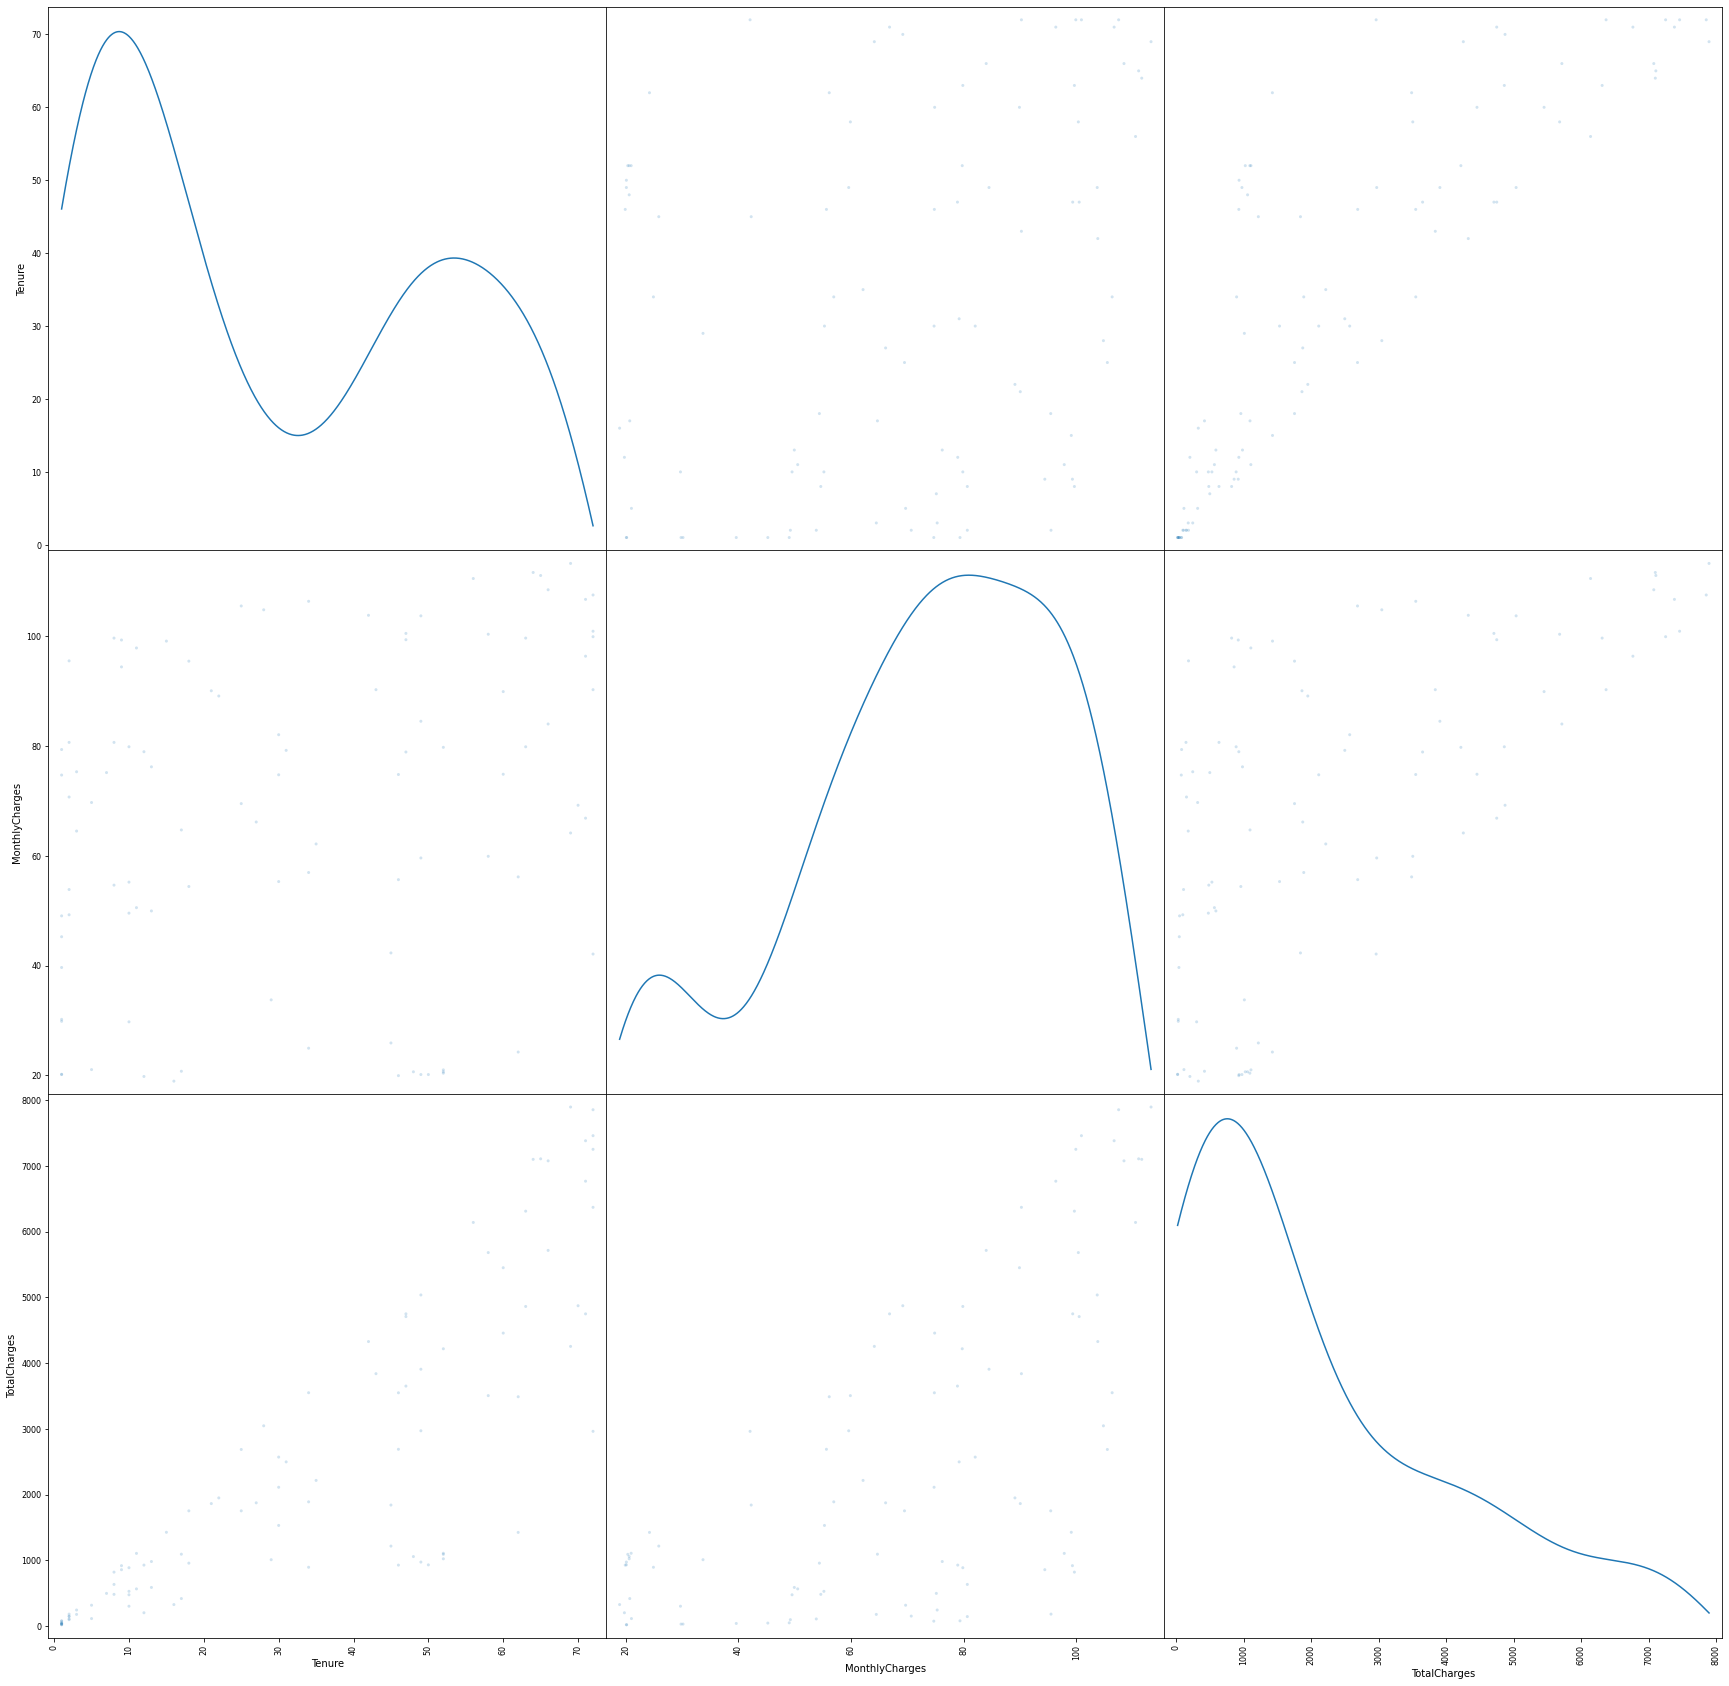

In [11]:
scatter_matrix(labeledData.select("Tenure", "MonthlyCharges", "TotalCharges").toPandas(), alpha=0.2, figsize=(30, 30), diagonal='kde')
plt.show()

### Counted Bar Plots

<AxesSubplot:xlabel='Contract'>

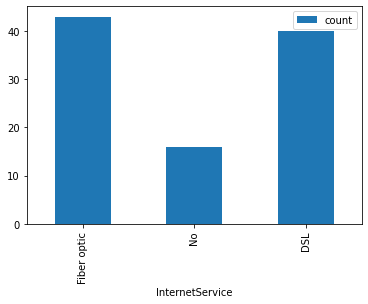

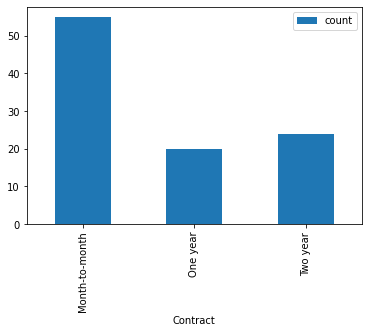

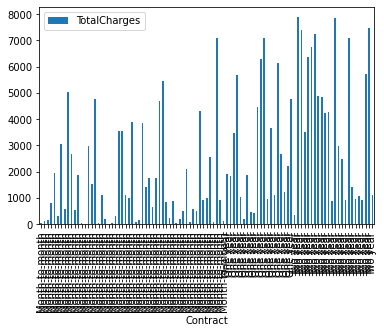

In [86]:
#df.printSchema()
df_plans = df.groupBy("InternetService").count()
#df_plans.show()
df_plans.toPandas().plot.bar(x="InternetService")


df_contracts = df.groupBy("Contract").count()
#df_contracts.show()
df_contracts.toPandas().plot.bar(x="Contract")

#labeledData.toPandas().plot.bar(x="Contract", y="Total_Charges_Int")

df_orderd = df.orderBy("Contract") 


df_orderd.toPandas().plot.bar(x="Contract", y="TotalCharges", secondary_y="MonthlyCharges")




In [ ]:
### Grouped Bar Plot

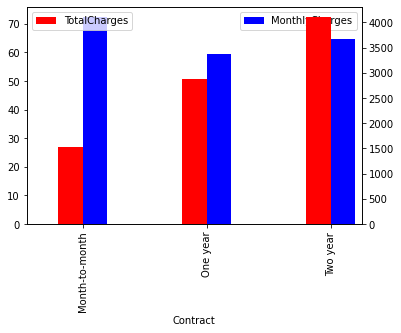

In [131]:
df_total = df.groupBy("Contract").avg("TotalCharges").withColumnRenamed("avg(TotalCharges)","TotalCharges")
df_monthly = df.groupBy("Contract").avg("MonthlyCharges").withColumnRenamed("avg(MonthlyCharges)","MonthlyCharges") \
    .withColumnRenamed("Contract","delContract")
#df_test.show()
#df_test2.show()

df_grouped = df_total.join(df_monthly, df_total.Contract == df_monthly.delContract)
df_grouped = df_grouped.drop("delContract")
#df_grouped.show()

fig = plt.figure()

ax = fig.add_subplot()
ax2 = ax.twinx()

width = 0.2
#df.plot(kind='bar')
pd_grouped = df_grouped.toPandas()
#pd_test.TotalCharges.plot(x='Contract',color='red', ax=ax, kind='bar', position=1)
#pd_test.MonthlyCharges.plot(x='Contract', color='blue', ax=ax2, kind='bar', position=0)
pd_grouped.plot(x="Contract", y="MonthlyCharges", color="blue", ax=ax, kind="bar", position=0, width=width)
pd_grouped.plot(x="Contract", y="TotalCharges", color="red", ax=ax2, kind="bar", position=1, width=width)

plt.show()

#df_test.plot(kind='bar' ax='Contract')

## Grouped Box Plots

### 1. Grouped By Contract 

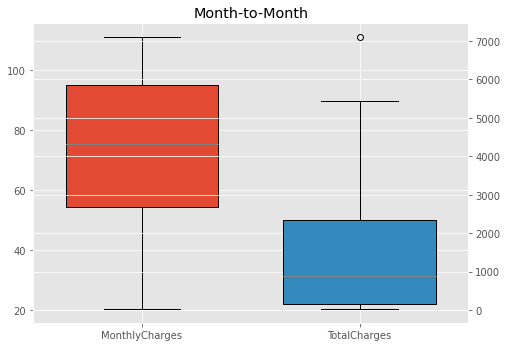

In [21]:
df_month = df.filter(df.Contract == "Month-to-month")
pd_month = df_month.toPandas()

#df_month.toPandas().boxplot(column=["TotalCharges","MonthlyCharges"],sym='r+', figsize=(20,15))

plt.style.use('ggplot')

fig, ax1  = plt.subplots(figsize=(7.8, 5.51))
ax2 = ax1.twinx()


#df_month.toPandas().plot(kind="box", x="TotalCharges", ax=ax, y="TotalCharges")
#df_month.toPandas().plot(kind="box", x="MonthlyCharges", ax=ax2, y="MonthlyCharges")
#plt.show()

box1 = ax1.boxplot(pd_month['MonthlyCharges'], positions=[0], **props)
props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="grey"))
box2 = ax2.boxplot(pd_month['TotalCharges'].values, positions=[1], **props)

pd_cols = pd_month[["MonthlyCharges","TotalCharges"]]
ax1.set_xlim(-0.5,1.5)
ax1.set_xticks(range(len(pd_cols.columns)))
ax1.set_xticklabels(pd_cols.columns)
for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
ax1.set_title('Month-to-Month')
plt.show()





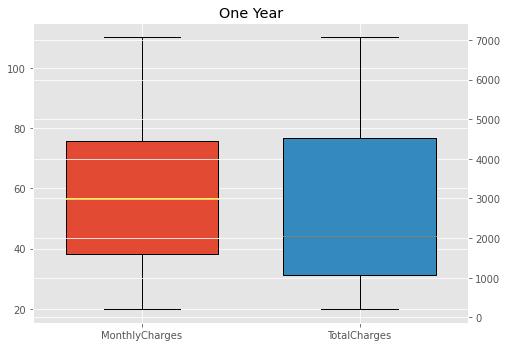

In [22]:
df_oneyear = df.filter(df.Contract == "One year")
pd_oneyear = df_oneyear.toPandas()

plt.style.use('ggplot')
fig, ax1  = plt.subplots(figsize=(7.8, 5.51))
ax2 = ax1.twinx()

props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="gold"))
box1 = ax1.boxplot(pd_oneyear['MonthlyCharges'], positions=[0], **props)
props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="grey"))
box2 = ax2.boxplot(pd_oneyear['TotalCharges'].values, positions=[1], **props)

ax1.set_xlim(-0.5,1.5)
ax1.set_xticks(range(len(pd_cols.columns)))
ax1.set_xticklabels(pd_cols.columns)
for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
ax1.set_title('One Year')
plt.show()

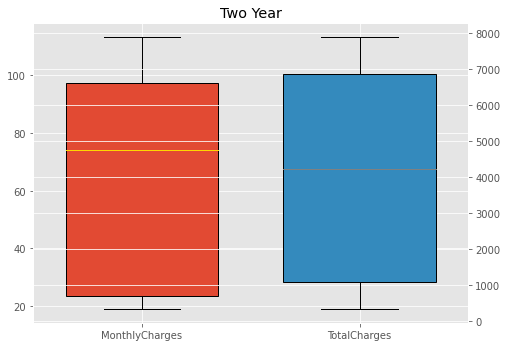

In [25]:
df_twoyear = df.filter(df.Contract == "Two year")
pd_twoyear = df_twoyear.toPandas()

plt.style.use('ggplot')
fig, ax1  = plt.subplots(figsize=(7.8, 5.51))
ax2 = ax1.twinx()

props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="gold"))
box1 = ax1.boxplot(pd_twoyear['MonthlyCharges'], positions=[0], **props)
props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="grey"))
box2 = ax2.boxplot(pd_twoyear['TotalCharges'].values, positions=[1], **props)

ax1.set_xlim(-0.5,1.5)
ax1.set_xticks(range(len(pd_cols.columns)))
ax1.set_xticklabels(pd_cols.columns)
for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
ax1.set_title('Two Year')
plt.show()

Text(0.5, 0.98, '')

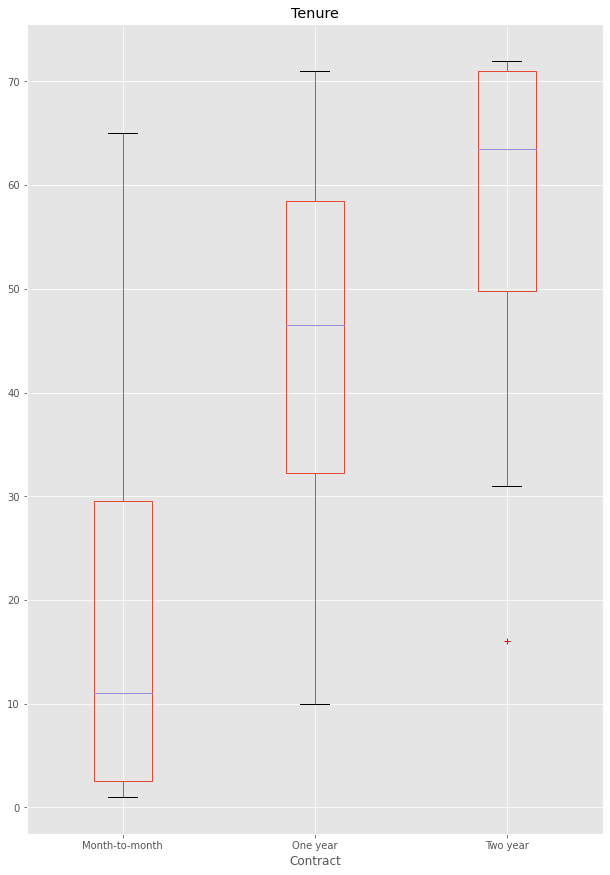

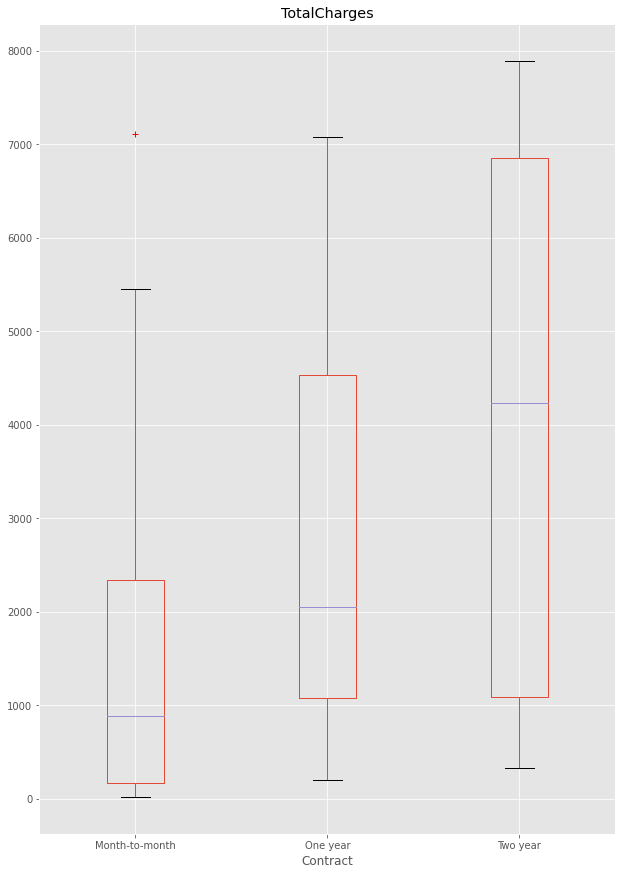

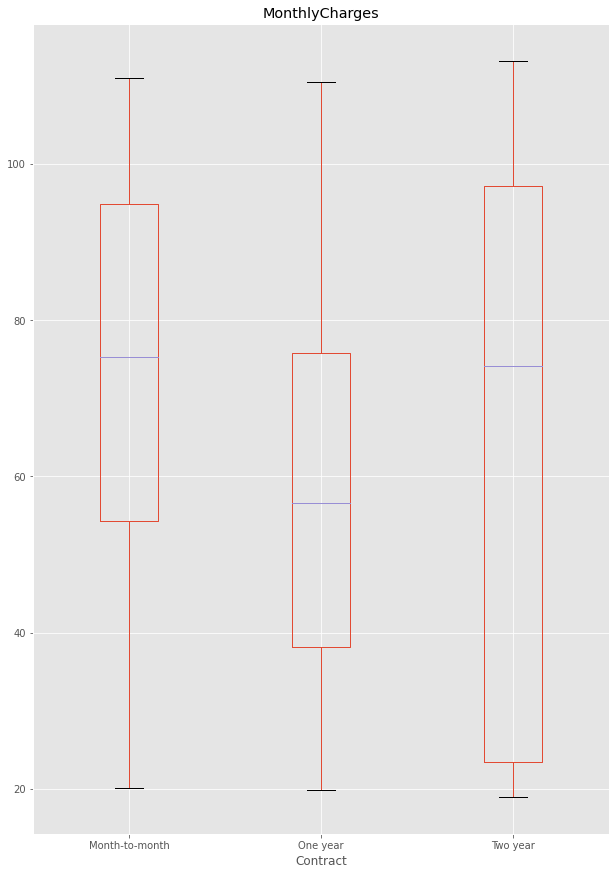

In [53]:
plt = df.toPandas().boxplot(sym='r+', column='Tenure', figsize=(10,15), by='Contract')
#plt.get_figure().gca().set_title("")
#plt.get_figure().gca().set_ylabel("")
#plt.get_figure().gca().set_xlabel("")
plt.get_figure().suptitle('')

plt2 = df.toPandas().boxplot(sym='r+', column='TotalCharges', figsize=(10,15), by='Contract')
#plt.get_figure().gca().set_title("")
#plt.get_figure().gca().set_ylabel("")
#plt.get_figure().gca().set_xlabel("")
plt2.get_figure().suptitle('')

plt3 = df.toPandas().boxplot(sym='r+', column='MonthlyCharges', figsize=(10,15), by='Contract')
#plt.get_figure().gca().set_title("")
#plt.get_figure().gca().set_ylabel("")
#plt.get_figure().gca().set_xlabel("")
plt3.get_figure().suptitle('')